# Vaishnavi Jagtap
## Data Science & Business Analytics Intern @ The Sparks Foundation

## Task 2
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# importing required librabries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris=load_iris()

# Convert the dataset as dataFrame
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Using K-means to determine number of clusters
### Finding value of K

In [4]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
arr = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 200, n_init = 10, random_state = 50)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

### Using elbow method

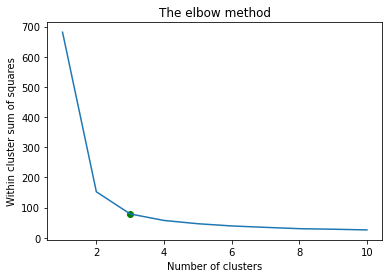

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), arr)
plt.scatter(3,arr[2],color="g")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

#### In above plot, we see that at 3 number of optimum clusters is where the elbow occurs.
#### Hence, we select value of K as 3

In [6]:
# Building the K-means Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

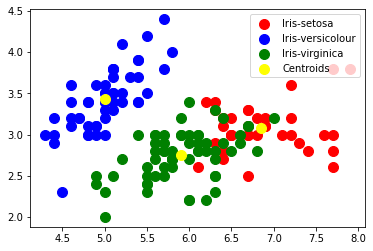

In [7]:
# plotting for sepal length and sepal width
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')
plt.show()

###### Hence, we have predicted the number of clusters as 3 and visualised them